POST MID SEM CIA  
NAME :JAISE GEORGE  
REG NO: 23122016  
CLASS :3MscDS A  

In [422]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

The data set is taken from the github(https://github.com/Defcon27/Data-Analysis-of-Indian-Automobile-dataset-using-Machine-Learning-in-R/blob/master/indian-auto-mpg.csv)

Loading data set

In [423]:
df= pd.read_csv("indian-auto-mpg (1).csv")

Checking for null values

In [424]:
df.isnull().sum()

SI                   0
Name                 0
Manufacturer         0
Location             2
Fuel_Type            4
Transmission         2
Owner_Type           2
Engine CC            0
Power                3
Seats                1
Mileage Km/L         1
Price                1
Year                 3
Kilometers_Driven    1
dtype: int64

using Labelencoder changed some catogarical coloumns to numerical coloum values 

In [425]:
columns_to_encode=["SI",'Name', 'Location', 'Fuel_Type', 'Transmission',]
for column in columns_to_encode:
    df[column] = LabelEncoder().fit_transform(df[column])


droping null values

In [426]:
df.dropna().head()

,SI,Name,Manufacturer,Location,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Year,Kilometers_Driven
0,0,1181,Maruti,9,0,1,First,998,58.16,5.0,26.60,1.75,2010.0,72000.0
3,3,1045,Maruti,2,1,1,First,1248,88.76,7.0,20.77,6.00,2012.0,87000.0
4,4,23,Audi,3,1,0,Second,1968,140.80,5.0,15.20,17.74,2013.0,40670.0
5,5,522,Hyundai,5,2,1,First,814,55.20,5.0,21.10,2.35,2012.0,75000.0
6,6,1358,Nissan,6,1,1,First,1461,63.10,5.0,23.08,3.50,2013.0,86999.0


In [427]:
df.columns

Index(['SI', 'Name', 'Manufacturer', 'Location', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Engine CC', 'Power', 'Seats', 'Mileage Km/L', 'Price',
       'Year', 'Kilometers_Driven'],
      dtype='object')

For fitting randomForest Classifier i take the code from the Sklearn site(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

For getting individual Tree plot and combined Random forest plot i use the help of chatgpet

Looping through each decision tree is my idea ,chat gpt give the code only for ploting the first individual decision tree

INDIVIDUAL TREE  1


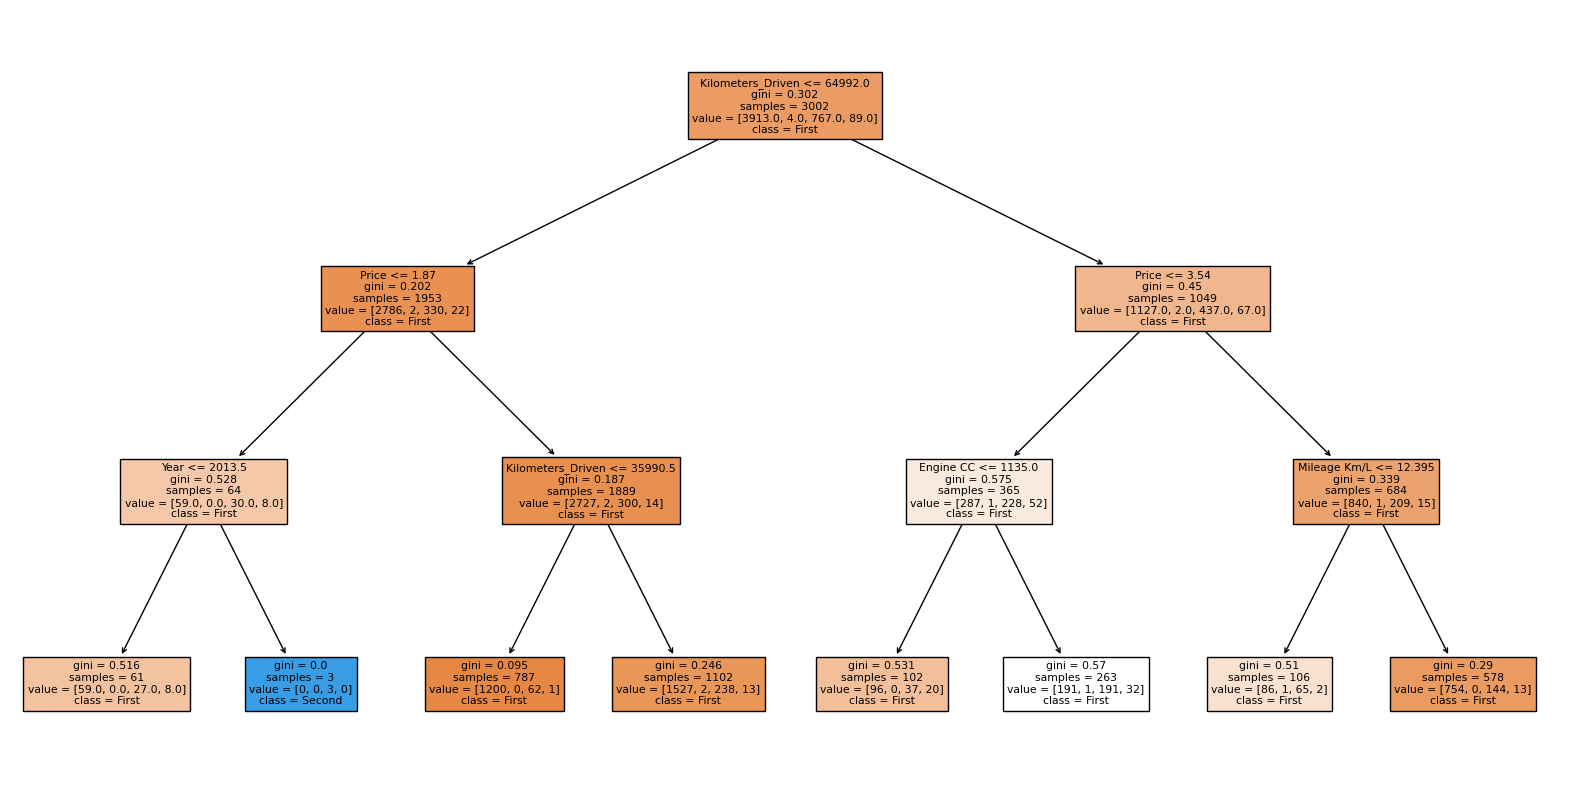

INDIVIDUAL TREE  2


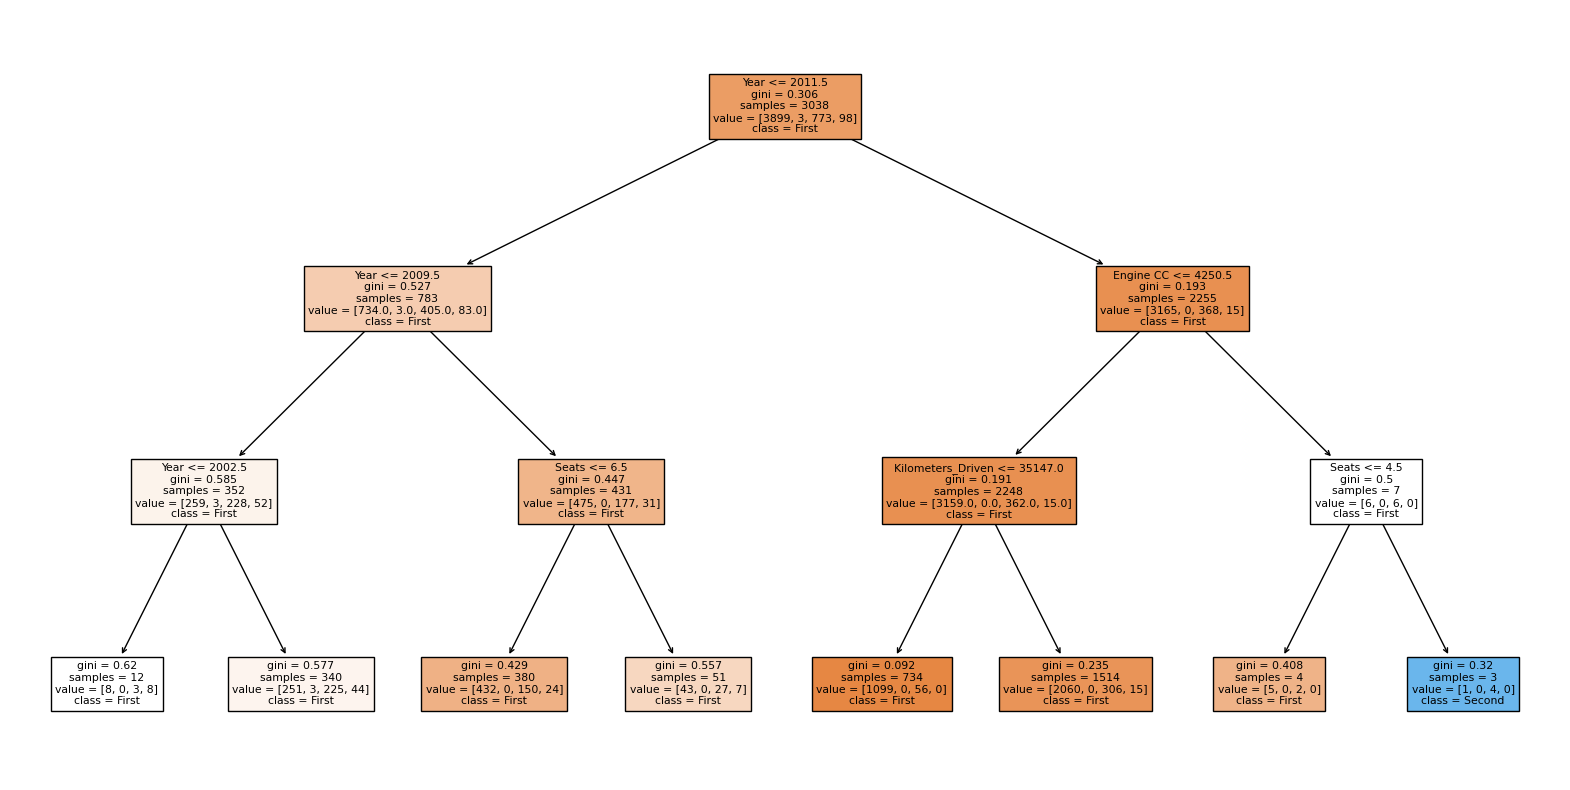

INDIVIDUAL TREE  3


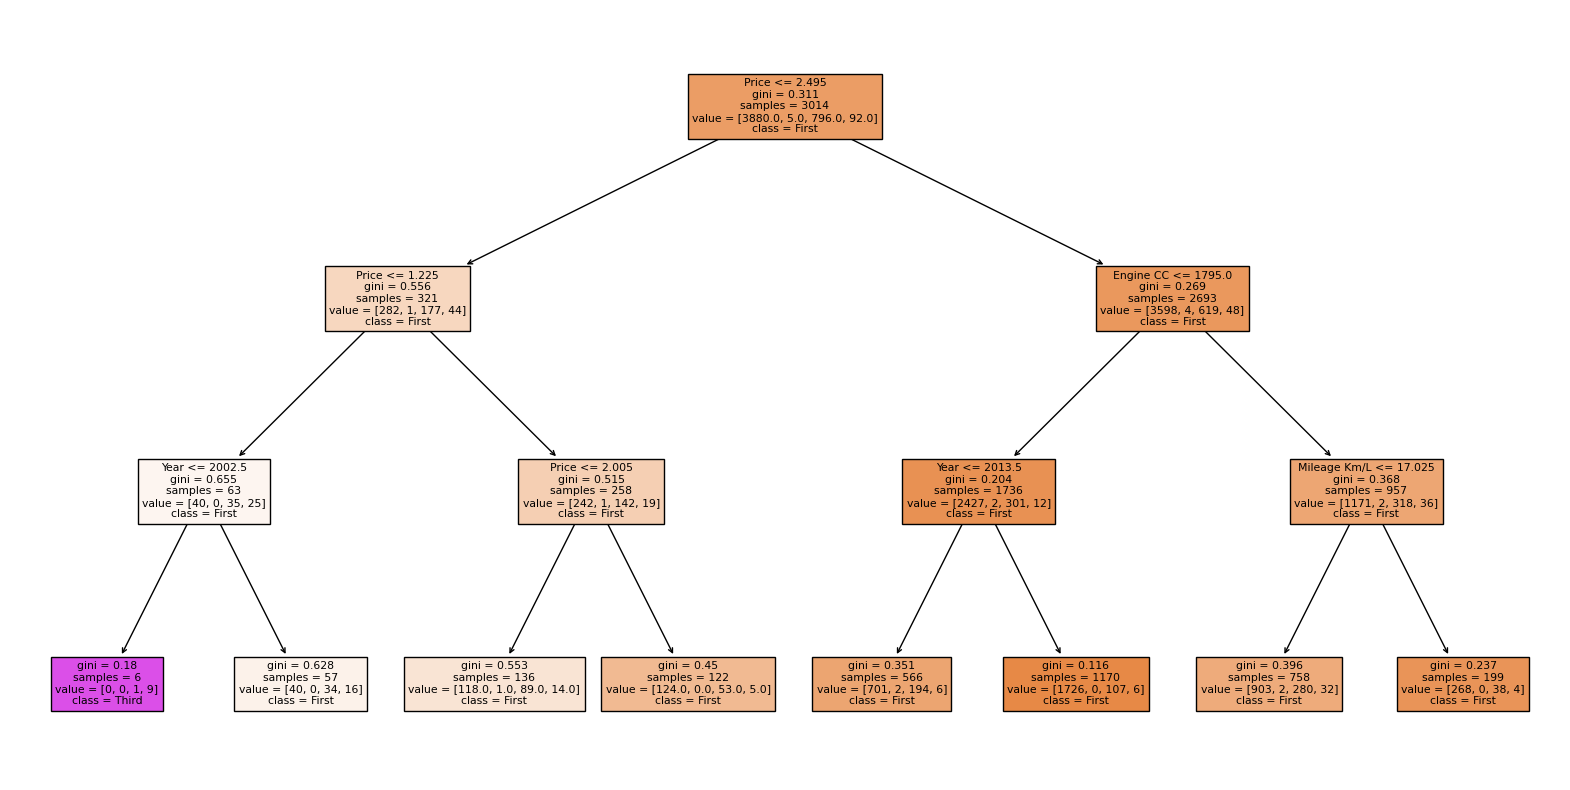

INDIVIDUAL TREE  4


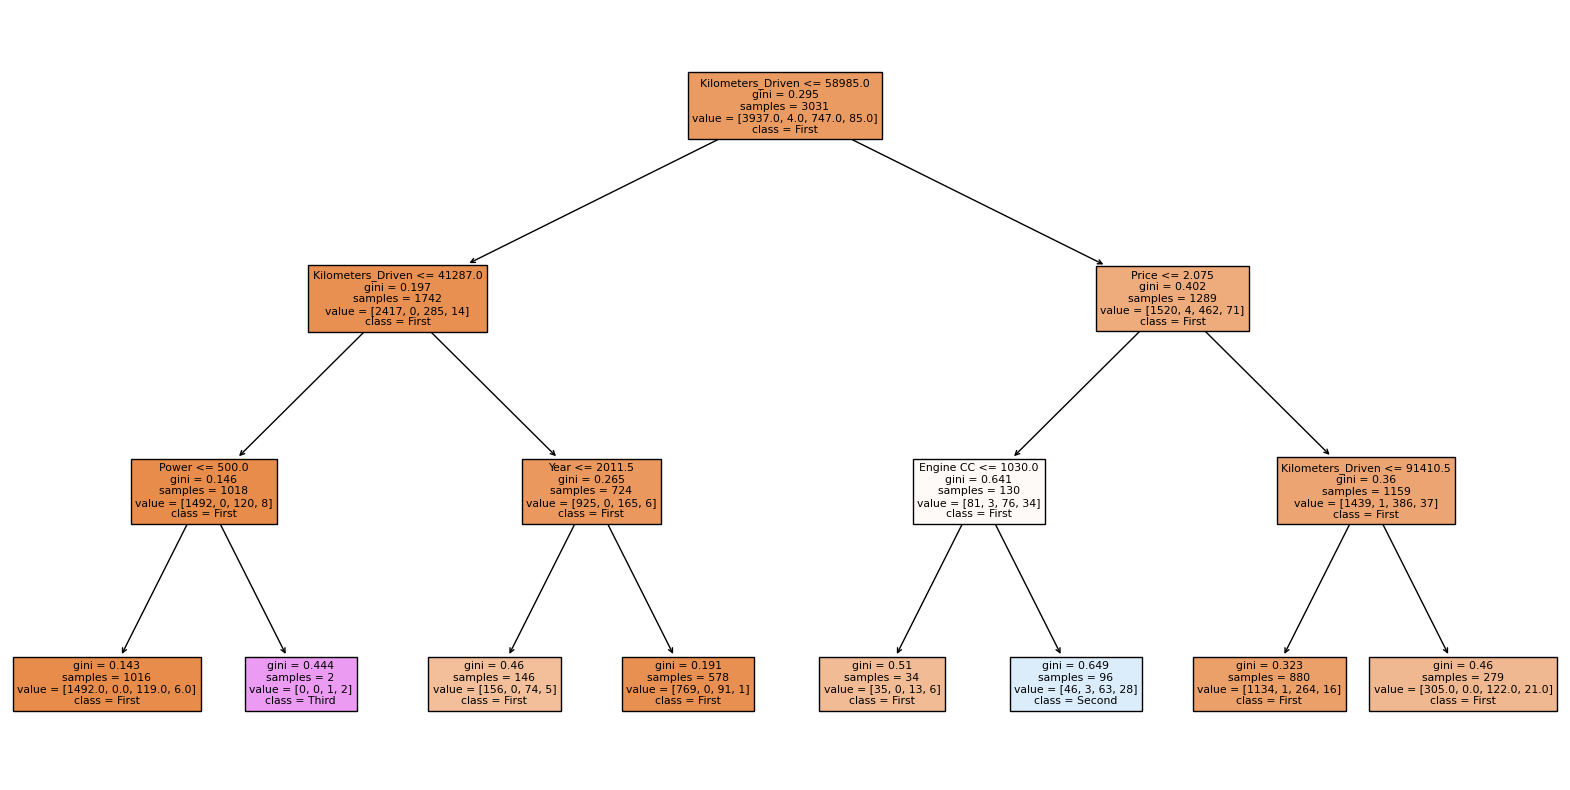

INDIVIDUAL TREE  5


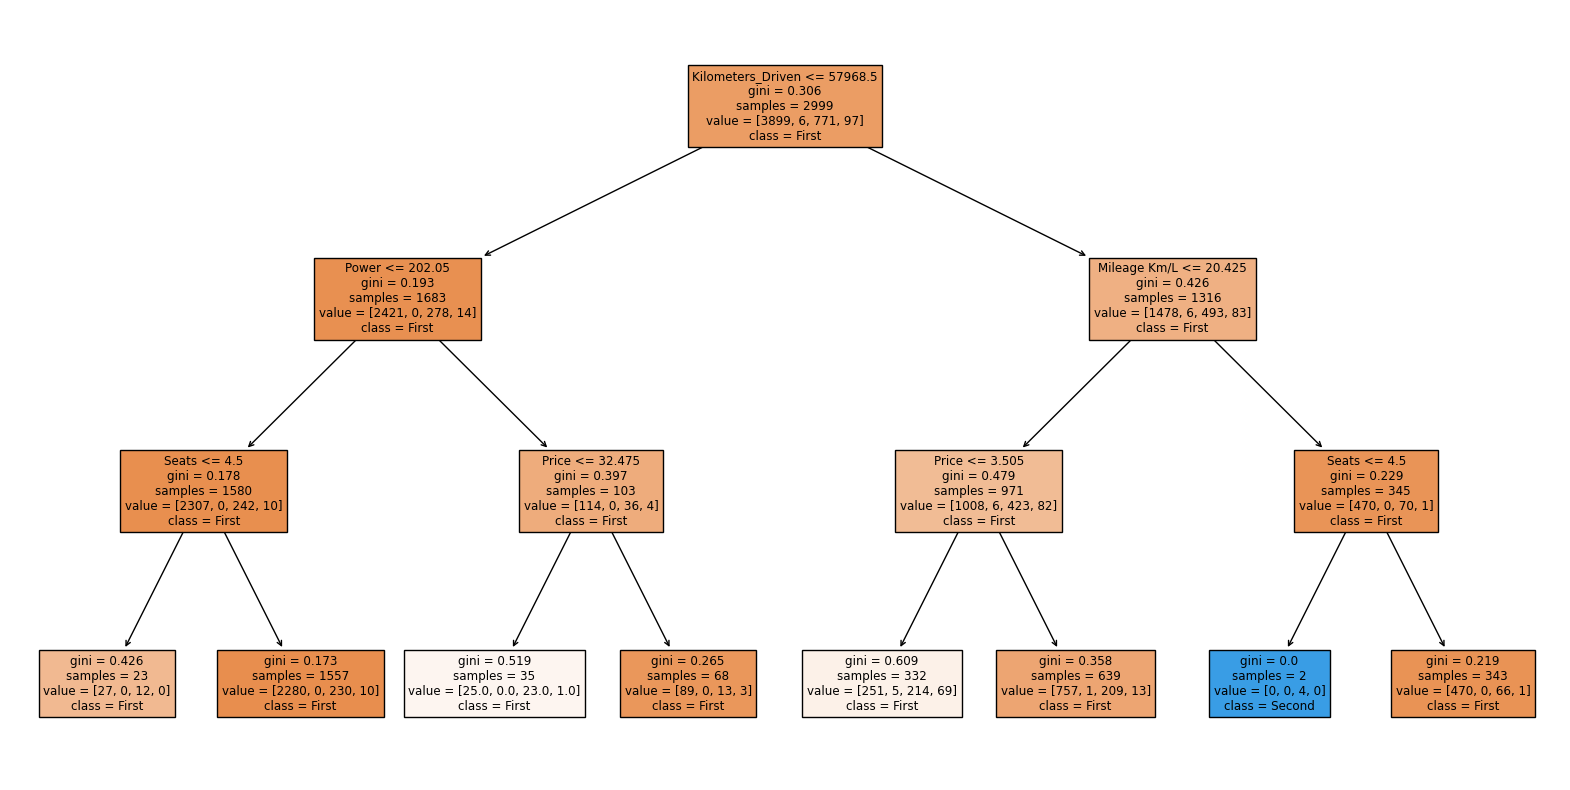

FINAL RESULT OF RANDOM FOREST(Which is the combination of all the above decision trees)


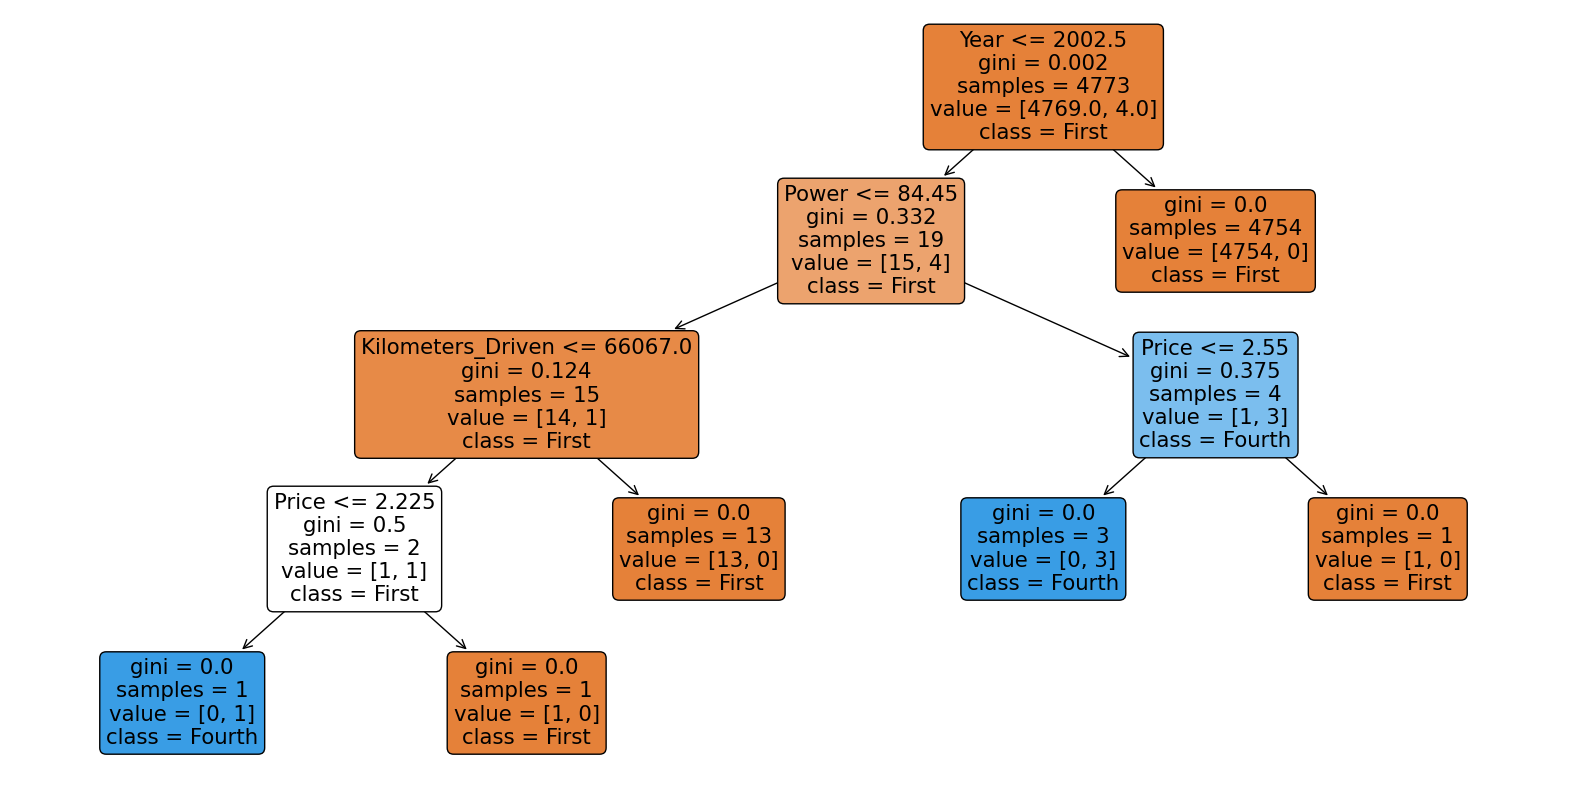

In [428]:
df_n=df.dropna()
c=['SI', 'Name', 'Manufacturer', 'Location', 'Fuel_Type', 'Transmission','Owner_Type']
X=df_n.drop(columns=c)
y=df_n["Owner_Type"]
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Training Random Forest Classifier
rf = RandomForestClassifier(n_estimators=5, random_state=42,max_depth=3)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_train)

# Accessing the individual trees
individual_trees = rf.estimators_

# Ploting all the individual trees
for i in range(len(rf.estimators_)):
    plt.figure(figsize=(20,10))
    plot_tree(individual_trees[i], feature_names=X.columns, class_names=rf.classes_, filled=True)
    print("INDIVIDUAL TREE ",i+1)
    plt.show()

#ploting the final result of random forest
surrogate_tree = DecisionTreeClassifier(random_state=42)
surrogate_tree.fit(X_train, rf_predictions)
plt.figure(figsize=(20, 10))
plot_tree(surrogate_tree, feature_names=X.columns, class_names=rf.classes_, filled=True, rounded=True)
print('FINAL RESULT OF RANDOM FOREST(Which is the combination of all the above decision trees)')
plt.show()

used gridSearchCV for Finding the optimum parameter

In [429]:
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'n_estimators': [1,2,3,4,5,6,7,8,9,10],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initializing the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fiting the grid search to the data
grid_search.fit(X_train, y_train)

# Printing the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Useing the best estimator
best_rf = grid_search.best_estimator_

# Predicting on test data
y_pred_best = best_rf.predict(X_test)



Fitting 3 folds for each of 900 candidates, totalling 2700 fits
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 6}


USED SAME CODE AND PASSED DATA THROUGH THE RANDOM FOREST ,PUTTING THE PARAMETER AS GIVEN BY THE GRIDSEARCH CV

AFTER FITING THE MODAL GIVE A LOOPING STATEMENT TO SEE DIFFRENT DICISION TREES CONSIDERED DURING RANDOM FOREST,ALSO AT THE END PLOTED THE RANDOMFOREST TREE ALSO

AFTER THAT USED ACCURACY TO FIND MODAL ACCURACY,ALSO FIND CLASSIFICATION REPORT AND CONFUSTION MATRIX

INDIVIDUAL TREE  1


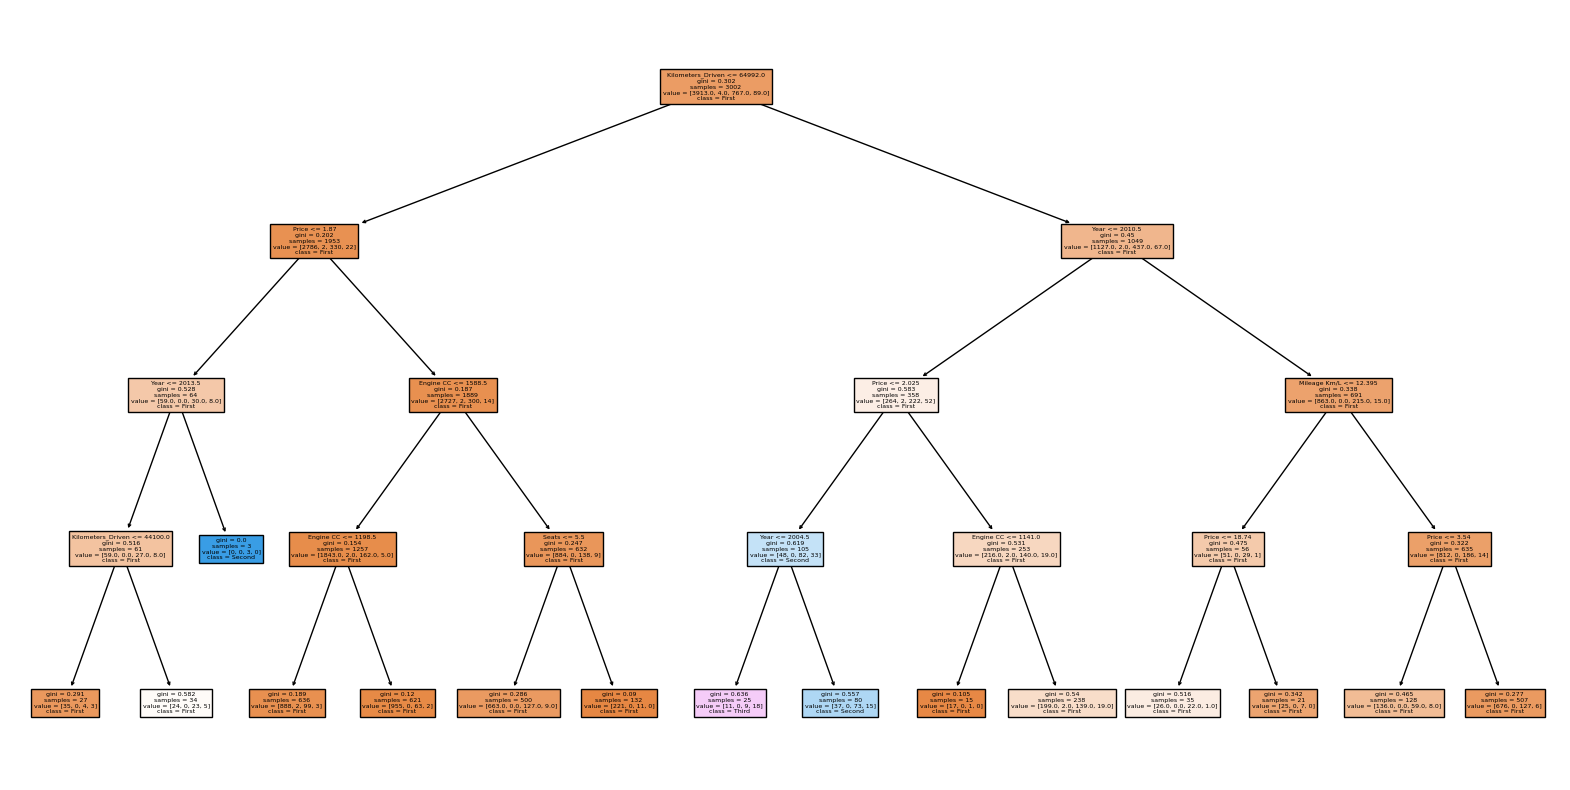

INDIVIDUAL TREE  2


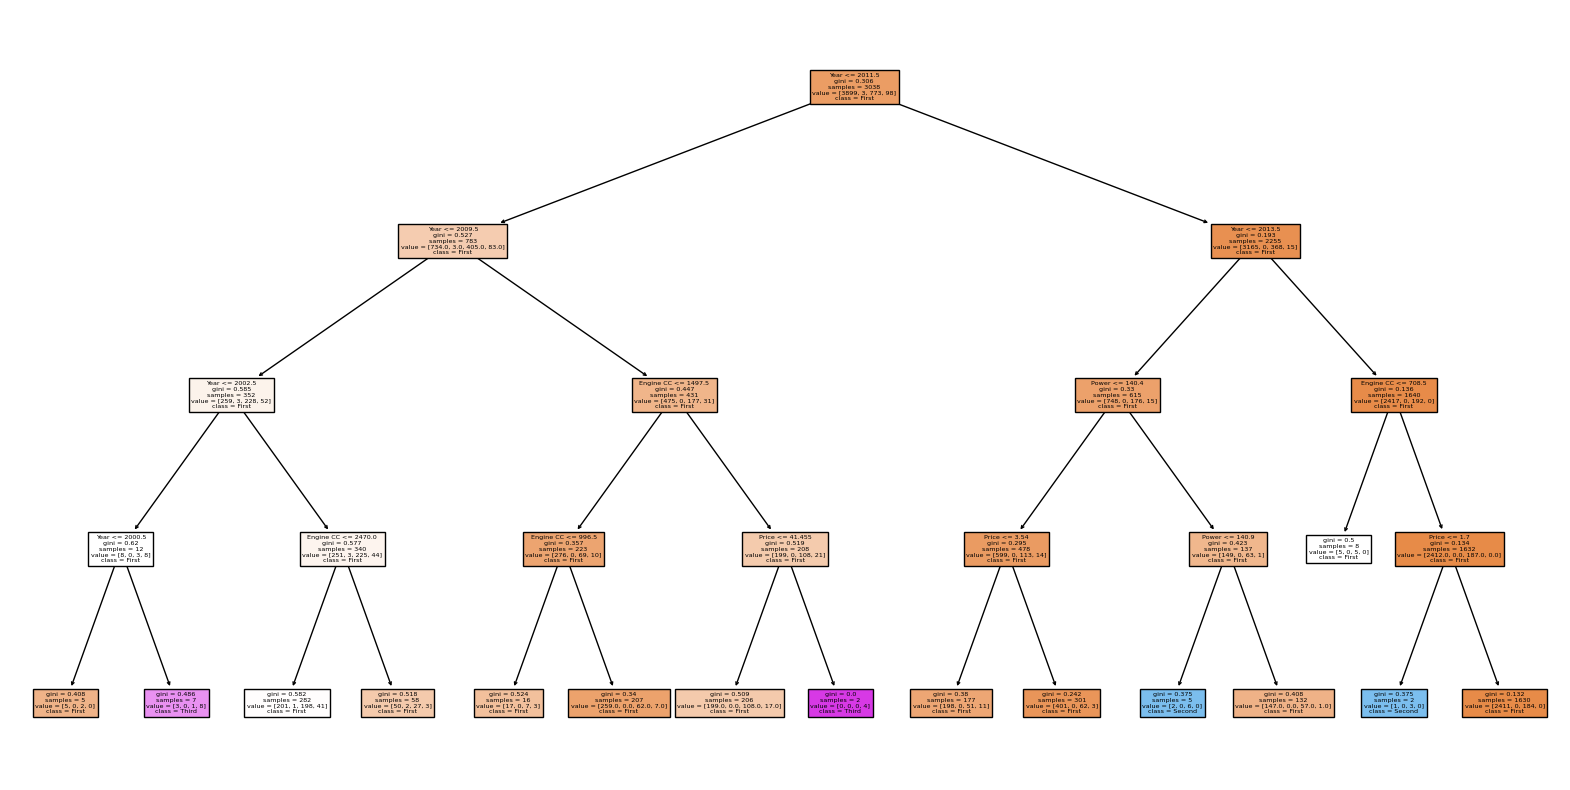

INDIVIDUAL TREE  3


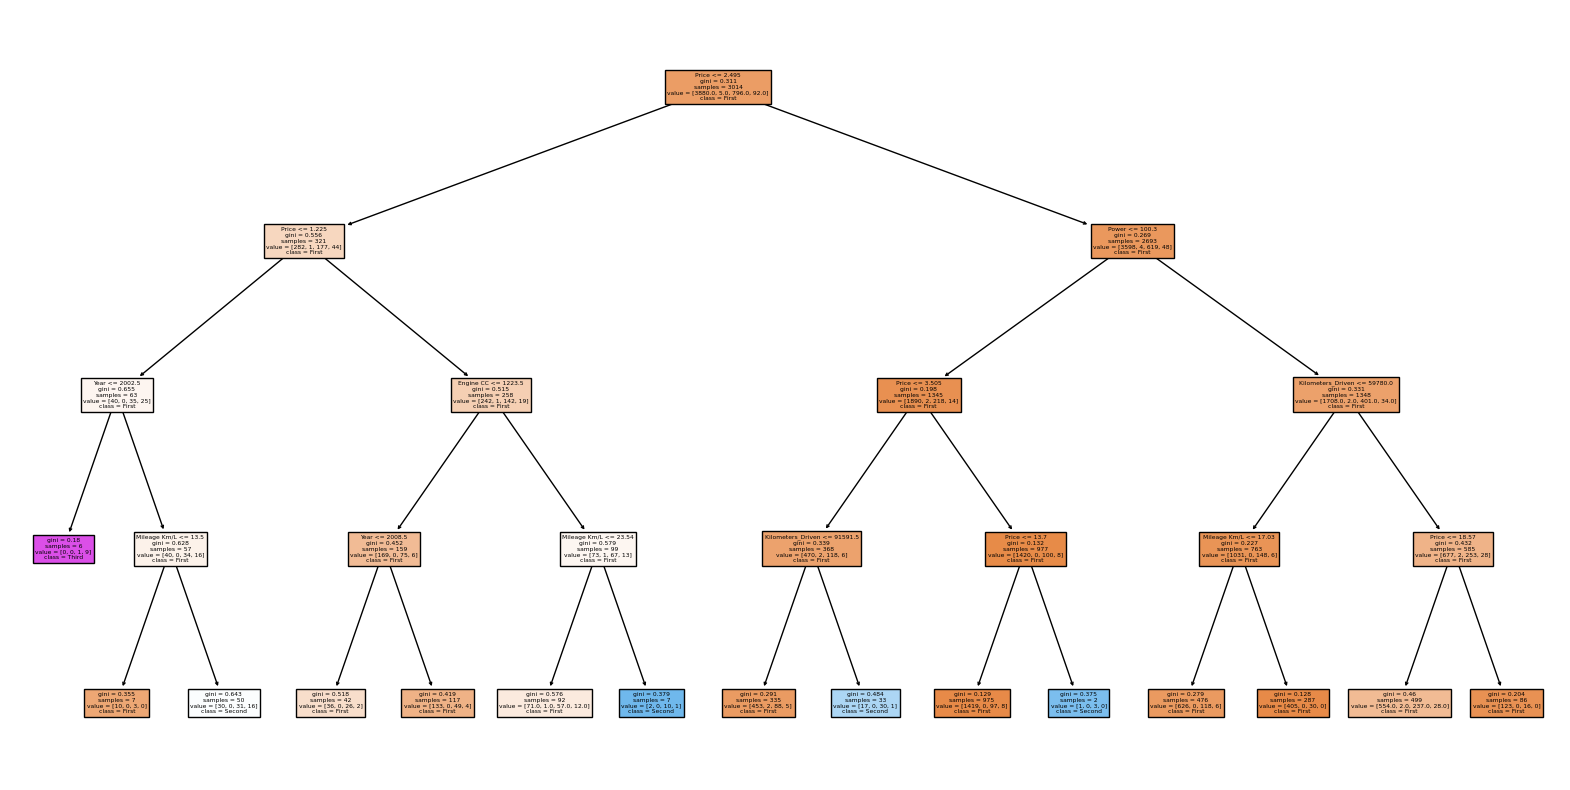

INDIVIDUAL TREE  4


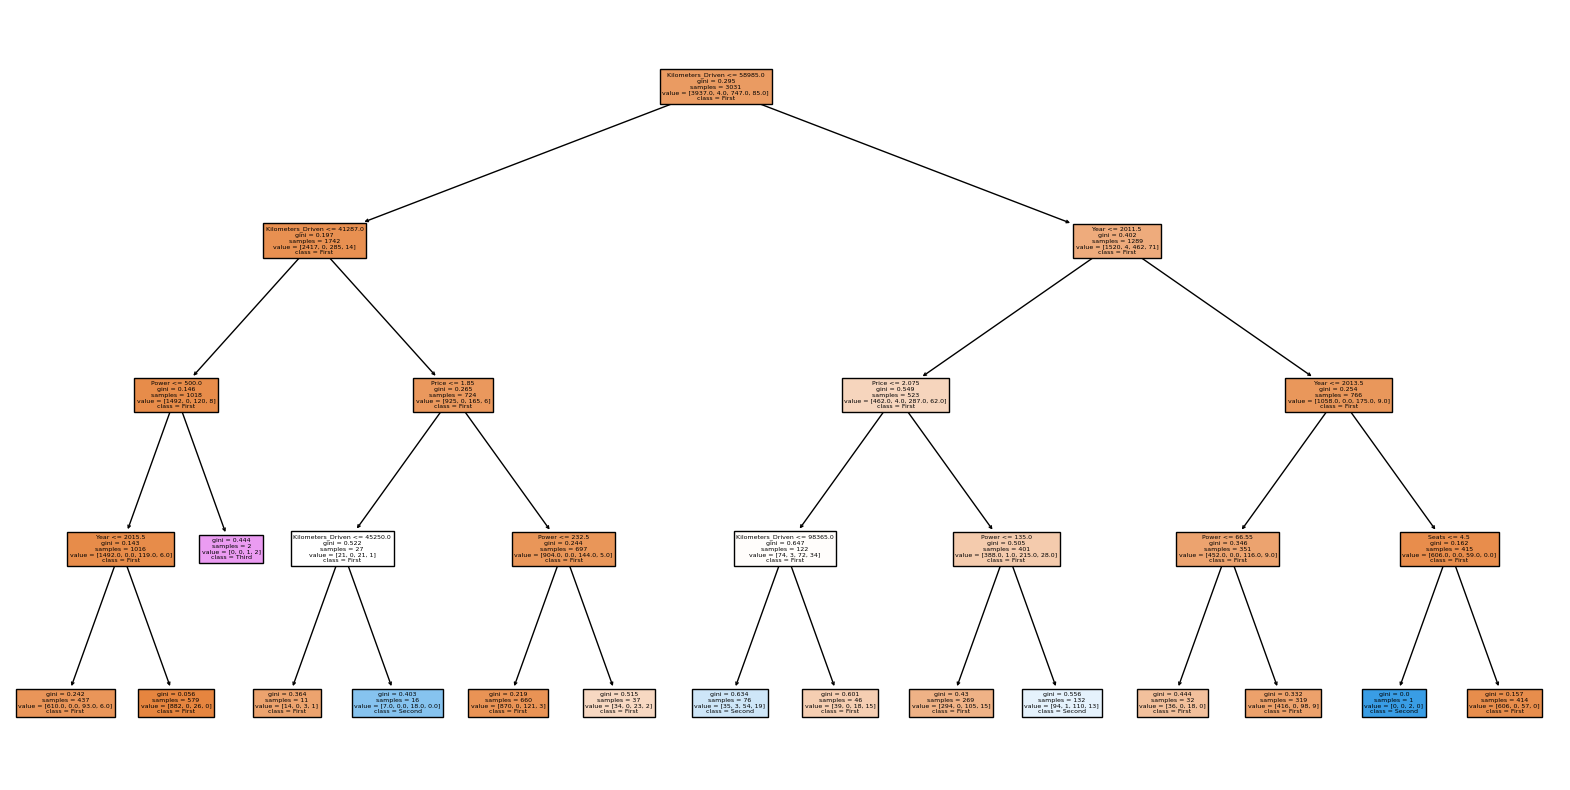

INDIVIDUAL TREE  5


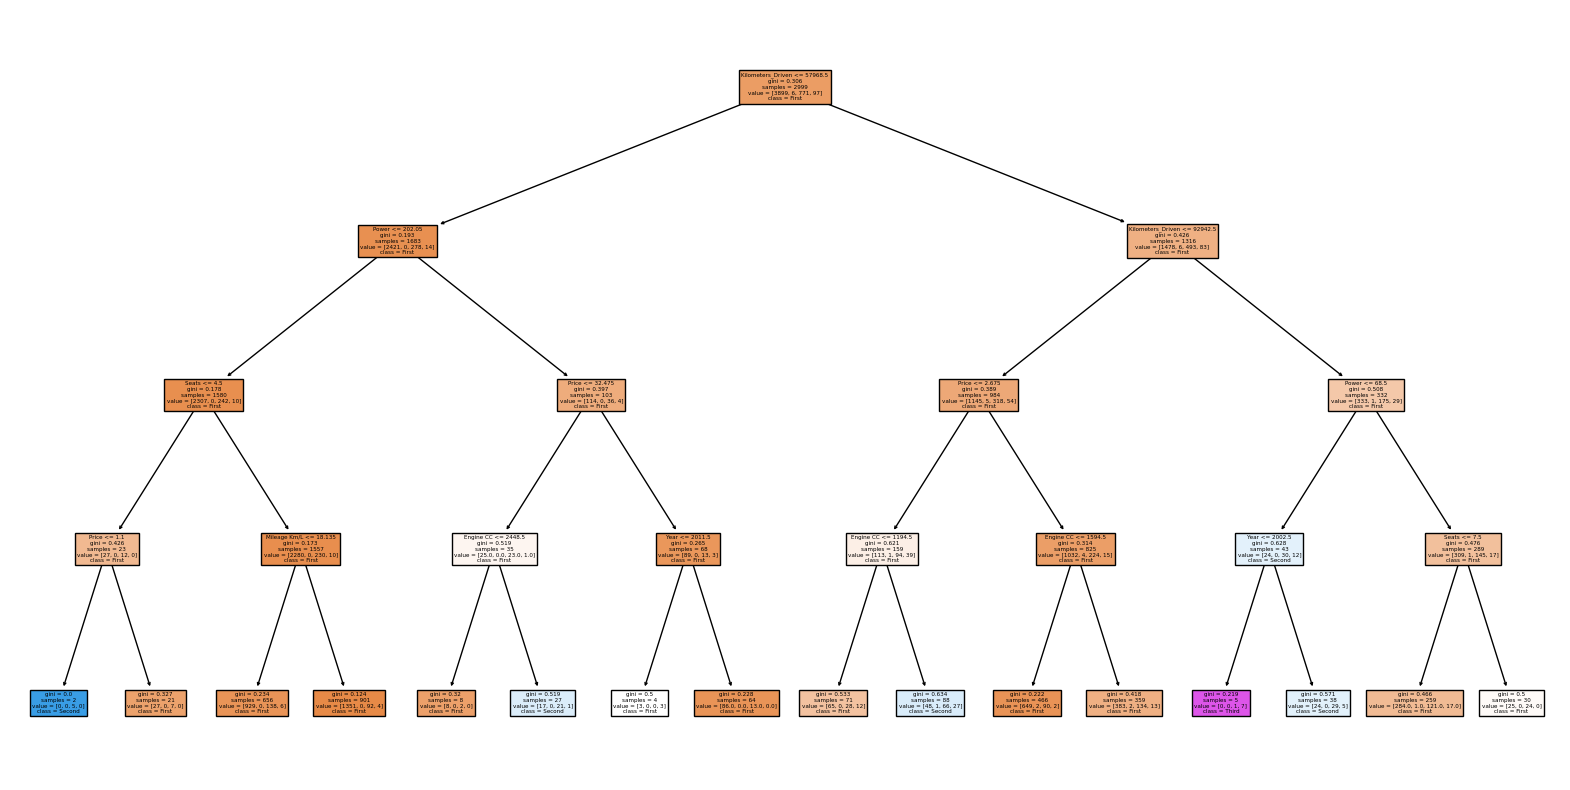

INDIVIDUAL TREE  6


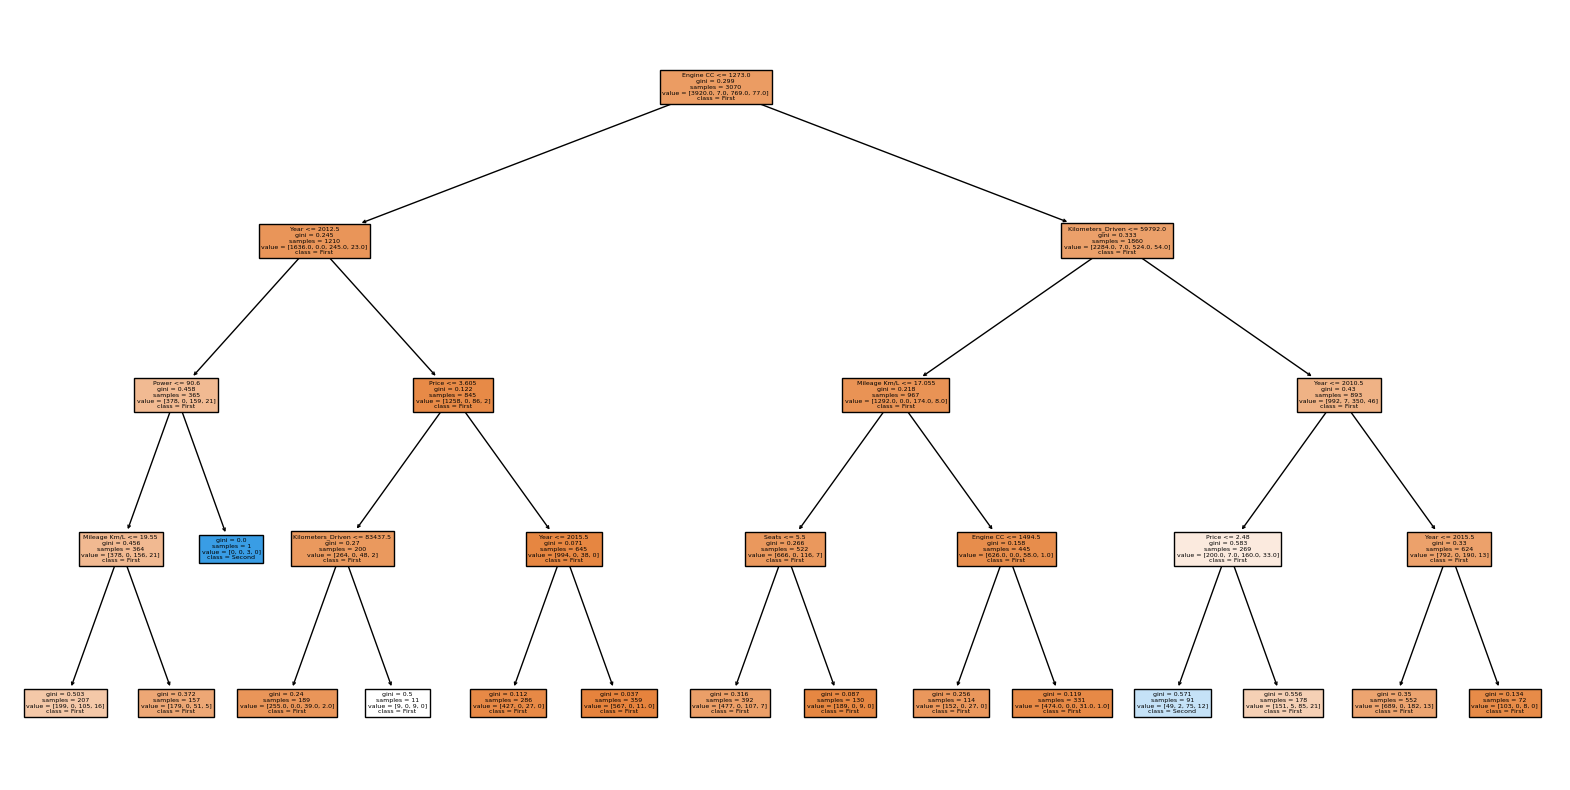

FINAL RESULT OF RANDOM FOREST(Which is the combination of all the above decision trees)


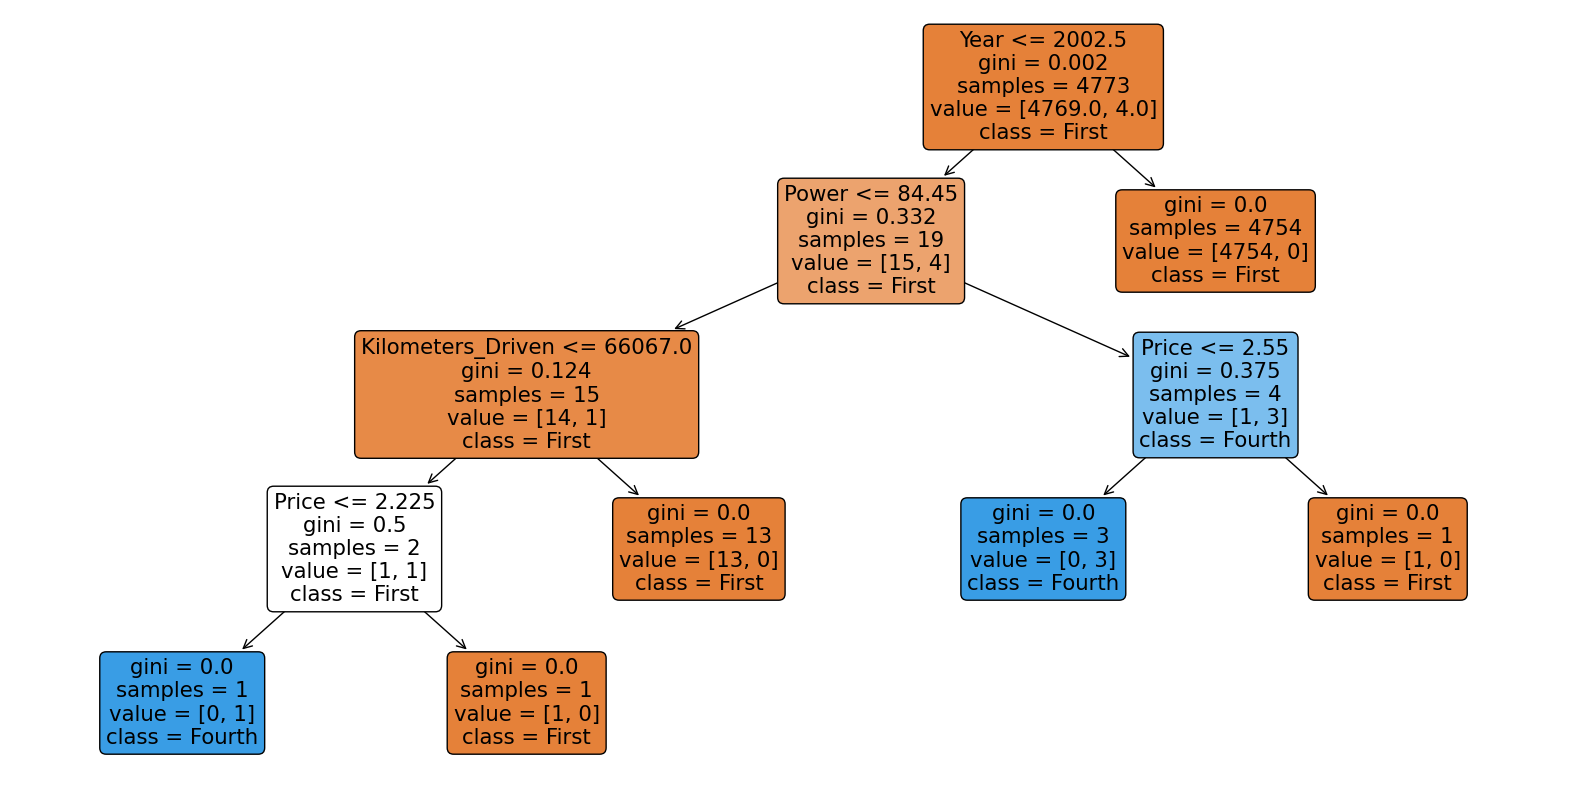

Accuracy of the random forest: 0.8199329983249581

Classificaton report:
              precision    recall  f1-score   support

       First       0.83      0.99      0.90       982
      Fourth       0.00      0.00      0.00         3
      Second       0.40      0.03      0.06       185
       Third       0.20      0.04      0.07        24

    accuracy                           0.82      1194
   macro avg       0.36      0.27      0.26      1194
weighted avg       0.75      0.82      0.75      1194


Confusion matrix:
[[972   0   8   2]
 [  3   0   0   0]
 [177   0   6   2]
 [ 22   0   1   1]]


c:\Users\jaise\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jaise\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jaise\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Traing Random Forest Classifier
rf = RandomForestClassifier(n_estimators=6, random_state=42,max_depth=4,min_samples_leaf=1,min_samples_split=10)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

# Accessing the individual trees
individual_trees = rf.estimators_

# Plot all the trees
for i in range(len(rf.estimators_)):
    plt.figure(figsize=(20,10))
    plot_tree(individual_trees[i], feature_names=X.columns, class_names=rf.classes_, filled=True)
    print("INDIVIDUAL TREE ",i+1)
    plt.show()

#ploting the final random forest tree
surrogate_tree = DecisionTreeClassifier(random_state=42)
surrogate_tree.fit(X_train, rf_predictions)
plt.figure(figsize=(20, 10))
plot_tree(surrogate_tree, feature_names=X.columns, class_names=rf.classes_, filled=True, rounded=True)
print('FINAL RESULT OF RANDOM FOREST(Which is the combination of all the above decision trees)')
plt.show()


# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest:", accuracy)
print("")
#finding classification report
print("Classificaton report:")
classification_=classification_report(y_test, y_pred)
print(classification_)
#printing confusion matrix
print("")
print("Confusion matrix:")
confusion_matrix=confusion_matrix(y_test, y_pred)
print(confusion_matrix)